## NLP Tookkit Example

In [4]:
from google.colab import drive #give colab access to google drive...
from google.colab import auth
import pandas as pd

auth.authenticate_user()
drive.mount('/content/drive')
thePath = '/content/drive/My Drive/DSE200_Data/'  #somewhere sensible....

theData = pd.read_csv(thePath+'amazon.csv')

theData.head()  #peek at first few rows


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


## Load the NLPToolkit

In [7]:
# Import NLTK and download required resources
!pip install nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## Let's confirm it works by tokenizing a simple dataset

In [18]:
from nltk.tokenize import word_tokenize

# Tokenize the reviews
theData['tokenized_reviews'] = theData['reviews.text'].apply(word_tokenize)

# Now create lowercase variation of theData['tokenized_reviews']...
# -------------------------

theData['lowercase_reviews'] = None  #YOU WRITE THIS...

# -------------------------
# Display the lowercase tokens
pd.set_option('display.max_colwidth', 100)
theData[['reviews.text', 'lowercase_reviews']].head()


I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cus

,reviews.text,lowercase_reviews
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[i, initially, had, trouble, deciding, between, the, paperwhite, and, the, voyage, because, revi..."
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[allow, me, to, preface, this, with, a, little, history, ., i, am, (, was, ), a, casual, reader,..."
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[i, am, enjoying, it, so, far, ., great, for, reading, ., had, the, original, fire, since, 2012,..."
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[i, bought, one, of, the, first, paperwhites, and, have, been, very, pleased, with, it, its, bee..."
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[i, have, to, say, upfront, -, i, do, n't, like, coroporate, ,, hermetically, closed, stuff, lik..."


## Great so far! Now remove "stop words" and punctuation

Now -- as we did last week, lets get rid of all the words in our text that are no use to us...

In [19]:
import string
from nltk.corpus import stopwords # Import the stopwords resource from NLTK

# Get English stopwords
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)  #const set of punctuation marks

# Remove stop words and punctuation from theData['lowercase_reviews']
# -----------------------

theData['cleaned_reviews'] = None;   #WRITE ME

#------------------------
# Show to visually compare our these two variationa...
theData[['cleaned_reviews', 'stemmed_reviews']].head()


,cleaned_reviews,stemmed_reviews
0,None,"[initi, troubl, decid, paperwhit, voyag, review, less, said, thing, paperwhit, great, spend, mon..."
1,None,"[allow, prefac, littl, histori, casual, reader, own, nook, simpl, touch, 2011, ve, read, harri, ..."
2,None,"[enjoy, far, great, read, origin, fire, sinc, 2012, fire, use, make, eye, hurt, read, long, nt, ..."
3,None,"[bought, one, first, paperwhit, pleas, constant, companion, suppos, ive, read, averag, book, eve..."
4,None,"[say, upfront, nt, like, coropor, hermet, close, stuff, like, anyth, appl, case, amazon, like, d..."


## Remove special chars and drop duplicates



In [25]:
import re

# Function using regex to remove special characters from tokens
def remove_special_chars(text):

  # ... WRITE ME ...
  theResult = None
  return theResult


# Apply the function to remove special characters
theData['cleaned_reviews'] = theData['cleaned_reviews'].apply(remove_special_chars)

# Drop duplicate reviews (if any)
theData.drop_duplicates(subset='reviews.text', keep='first', inplace=True)

# Display the cleaned tokens (without special characters and duplicates)
theData[['reviews.text', 'cleaned_reviews']].head()


NameError: name 'theResult' is not defined

## We could "stem" our words, reduce by brute force to base form. For example: 'coding'=>'code

In [24]:

from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokens -- write code to stem theData['cleaned_reviews']
theData['stemmed_reviews'] = None;  # WRITE ME

# Compare our these two variationa...
theData[['cleaned_reviews', 'stemmed_reviews']].head()


,cleaned_reviews,stemmed_reviews
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


## But 'lemmaization' is more effective -- and contextualized (this code is ready to run)


In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer() #init

# Function to get the correct part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Apply lemmatization to the tokens with POS tags
theData['lemma_reviews'] = theData['cleaned_reviews'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x])
theData[['reviews.text', 'lemma_reviews']].head()


TypeError: 'NoneType' object is not iterable

## Sentiment analysis

We will use the VADAR library to calculate sentiment from our dataset.  

> `compound_score` is overall sentiment <BR>
  `sentiment` classifies rows 'positive','negative' or 'neutral'

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


theSentimeter = SentimentIntensityAnalyzer() #init me

# --- 1. get polarity_scores for theData['lemma_reviews'] ---

theData['sentiment_scores'] = None #WRITE ME!

# --- 2. # Extract just compound value from sentiment score (overall sentiment)

theData['compound_score'] = None #WRITE ME!

# --- 3. # Categorize based on compound score: POS: > 0.7, NEG: < 0.4 else NEUTRAL

theData['sentiment'] = None #WRITE ME!


# Display reviews with their sentiment
theData[['tokenized_reviews', 'sentiment_scores','compound_score', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,reviews.text,tokenized_reviews,compound_score,sentiment
0,I initially had trouble deciding between the paperwhite and the voyage because reviews more or l...,"[I, initially, had, trouble, deciding, between, the, paperwhite, and, the, voyage, because, revi...",0.9804,positive
1,Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simp...,"[Allow, me, to, preface, this, with, a, little, history, ., I, am, (, was, ), a, casual, reader,...",0.9874,positive
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to m...,"[I, am, enjoying, it, so, far, ., Great, for, reading, ., Had, the, original, Fire, since, 2012,...",0.4364,positive
3,I bought one of the first Paperwhites and have been very pleased with it its been a constant com...,"[I, bought, one, of, the, first, Paperwhites, and, have, been, very, pleased, with, it, its, bee...",0.9743,positive
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Appl...","[I, have, to, say, upfront, -, I, do, n't, like, coroporate, ,, hermetically, closed, stuff, lik...",0.9934,positive


## And finally, one more visualization tool to show final result

LEMMA REV:  0      [initially, trouble, decide, paperwhite, voyage, review, less, say, thing, paperwhite, great, sp...
1      [allow, preface, little, history, casual, reader, own, nook, simple, touch, 2011, ve, read, harr...
2      [enjoy, far, great, reading, original, fire, since, 2012, fire, use, make, eye, hurt, read, long...
3      [bought, one, first, paperwhites, pleased, constant, companion, suppose, ive, read, average, boo...
4      [say, upfront, nt, like, coroporate, hermetically, close, stuff, like, anything, apple, case, am...
                                                      ...                                                 
236    [ve, echo, show, little, 24, hour, please, take, consideration, currently, original, echo, livin...
237    [wait, two, day, set, show, give, reward, work, read, majority, review, already, post, idea, eve...
238    [first, day, echo, show, m, pretty, pleased, observation, think, hit, review, sound, quality, se...
239    [read, review, fir

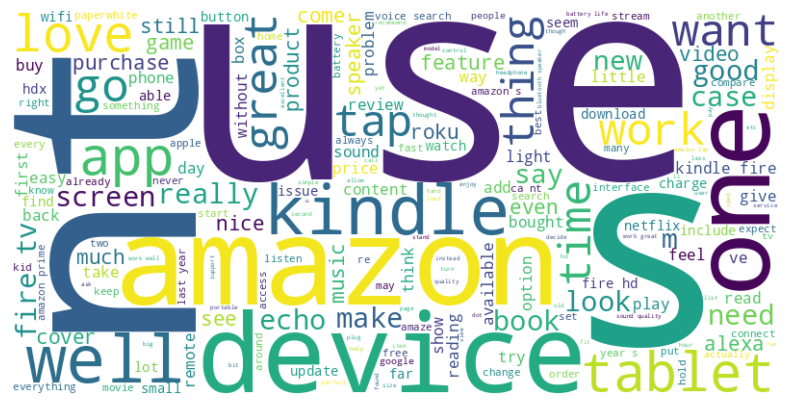

In [27]:
!pip install wordcloud

# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#  Get all the words from theData['lemma_reviews'] and make word cloud...

# WRITE ME...

theCloud = WordCloud(width=800, height=400, background_color='white').generate( ????? )

# Present the cloud...



## Ok, that's cool -- but what products were they referring to?

Let's build a cloud using this approach:

- We iterate through each row of our DataFrame
- We use pos_tag to identify proper nouns (likely product names) within the lemma_reviews column
- We store these product names along with their cumulative sentiment scores in the product_sentiment dictionary


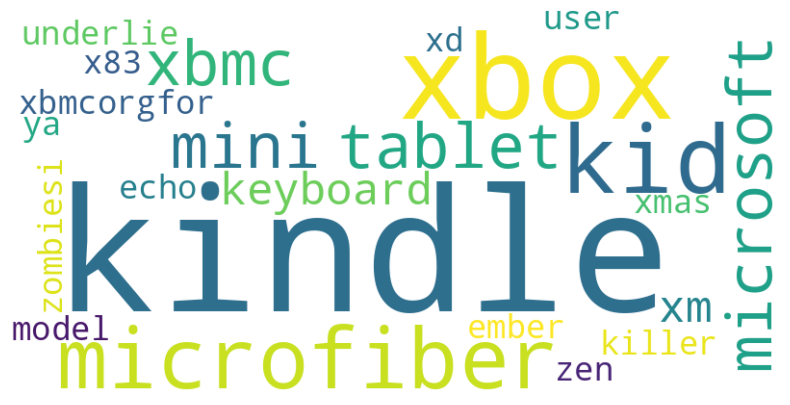

In [17]:
import nltk
from nltk.corpus import wordnet
from nltk.tag import pos_tag

# Last challenge.

# Some of the words in the theData['lemma_reviews'] refer to products.
# How would you find "product related words" -- and make a wordcloud
# for just them, making scale of the word related to overall use in text?

# --- Write me ----


